# Read in and Visualize Datasets

In this notebook you will learn how to read in .csv files using [numpy](http://www.numpy.org/) and do basic visualizations with [matplotlib](http://matplotlib.org/). We recommend to read and execute the notebook from top to bottom. 


### Before you start
* Be sure that you have downloaded the Boston Housing Dataset files (`housing_all.data`, `housing_all.labels`) and Iris files (`iris_train.data, iris_train.labels, iris_test.data`) from ILIAS.
* This notebook runs for sure with *Python3.4* and requires the following packages
  * *matplotlib*
  * *numpy*
* We will use [numpy.loadttxt](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.loadtxt.html), but you can use any csv reader (such as [csv](https://docs.python.org/3.4/library/csv.html)) of your choice or write your own.

<font color="red">**Remark** (only relevant if you are not familiar with Python):</font> In this notebook we already use the python package numpy. [NumPy](http://numpy.org) is the fundamental package for scientific computing with Python. In this notebook we make use of numpy's csv-reader and N-dimensional array objects (NumPy itself can do many more things), which are more intuitive to handle than lists of lists. Here are two code snippets (which do the same thing) to show how lists and numpy array relate to each other.

In [1]:
# Use lists of lists
a = [[0]*3,[0, 0] + [0]]  # Create 2x3 array with zeros
print("1:", a)

a[0][0] = 1  # Change one number
print("2:", a)

# Change second element in each row
for idx in range(len(a)):
    a[idx][2] = 23
print("3:", a)

1: [[0, 0, 0], [0, 0, 0]]
2: [[1, 0, 0], [0, 0, 0]]
3: [[1, 0, 23], [0, 0, 23]]


In [2]:
# Use numpy arrays
import numpy

# Create 2x3 array with zeros
a = numpy.zeros([2,3])
print("1:", a)

# Change one number
a[0, 0] = 1
print("2:", a)

# Change second element in each row
a[:, 2] = 23
print("3:", a)

1: [[0. 0. 0.]
 [0. 0. 0.]]
2: [[1. 0. 0.]
 [0. 0. 0.]]
3: [[ 1.  0. 23.]
 [ 0.  0. 23.]]


## Overview of this notebook

We'll do the following:

  1. **Classification**: Iris Dataset
    * Load dataset
    * Number of samples per class
    * Plot two features against each other

  2. **Regression**: Boston Housing Dataset
    * Load dataset
    * Plot each feature against target value

## Classification: Iris Dataset

In this part we will work with the classification dataset Iris (see https://en.wikipedia.org/wiki/Iris_flower_data_set). It consists of 150 samples of 3 different species of the flowering plant Iris. 
Each sample is described by 4 different features. 

* * *
**REMARKS:** For this dataset we provide training and test data, because this is the typical setup for machine learning tasks and you will work with this dataset in your first exercise. You have labelled data (training data) you can use to train your model and you have another dataset (test data) for which you don't use the labels during training. This concept allows to compare different models objectively.
* * *

We splitted the dataset in a training and a test split where the training split contains 100 samples and the test split the remaining 50 samples.

You need the following files in order to run the code:

    iris_train.data
    iris_train.labels
    iris_test.data
    (yes, there are no labels for the test dataset, see REMARKS below)

### Load dataset
We first load the training / test data and the labels for the training data through [numpy](http://www.numpy.org/). As a result we get the data in form of a multidimensional array which is the main object in numpy. 

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X_train = np.loadtxt("iris_train.data")
y_train = np.loadtxt("./iris_train.labels")
X_test = np.loadtxt("./iris_test.data")

print("Traindata: found %3d data points with %d features each" % (X_train.shape[0], X_train.shape[1]))
print("Testdata : found %3d data points with %d features each" % (X_test.shape[0], X_test.shape[1]))


Traindata: found 100 data points with 4 features each
Testdata : found  50 data points with 4 features each


### Number of samples per class

Before we start to work with this dataset, we will have a brief look at some statistics. The following lines of code count the number of datapoints of each class and
plot a histogram.

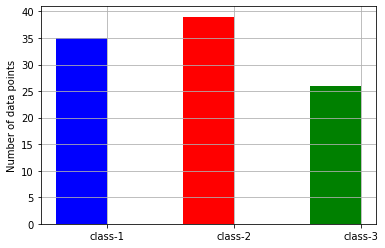

In [4]:
indices_class1 = np.where(y_train == 0)[0]
indices_class2 = np.where(y_train == 1)[0]
indices_class3 = np.where(y_train == 2)[0]
plt.bar(1, len(indices_class1), width=0.4, color="blue")
plt.bar(2, len(indices_class2), width=0.4, color="red")
plt.bar(3, len(indices_class3), width=0.4, color="green")
plt.xticks([1.2, 2.2, 3.2], ["class-1", "class-2", "class-3"])
plt.ylabel("Number of data points")
plt.grid()
plt.show()

### Plot two features against each other

Now we have look at the actual data. Each of the following plots shows the values of 2 out of the 4 features for each datapoint. The color of each dot indicates the assgined class label.
As you can see some features allow to easily distinguish between classes.

(100, 4)


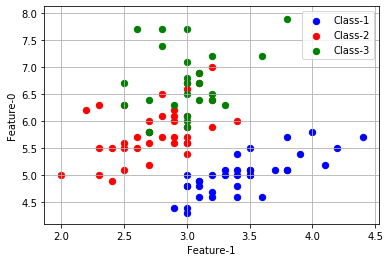

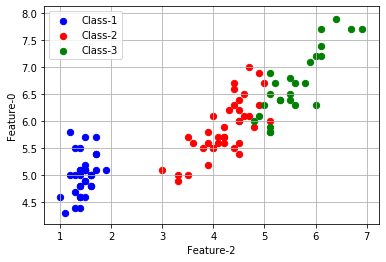

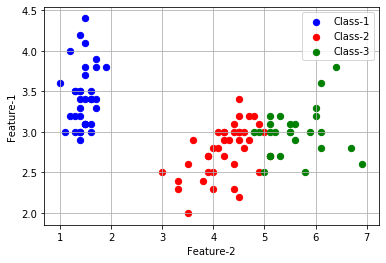

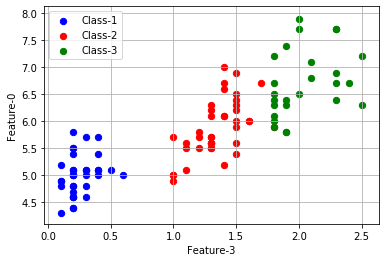

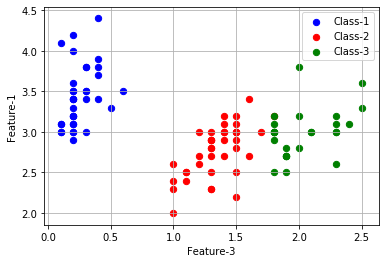

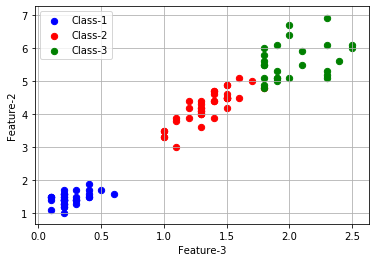

In [5]:
labels = ["Feature-0", "Feature-1", "Feature-2", "Feature-3"]
print(X_train.shape)

for i in range(X_train.shape[1]):
    for j in range(i):
        plt.scatter(X_train[indices_class1, i], X_train[indices_class1, j], color="b", s=40, label="Class-1")
        plt.scatter(X_train[indices_class2, i], X_train[indices_class2, j], color="r", s=40, label="Class-2")
        plt.scatter(X_train[indices_class3, i], X_train[indices_class3, j], color="g", s=40, label="Class-3")
        plt.xlabel(labels[i])
        plt.ylabel(labels[j])
        plt.legend()
        plt.grid()
        plt.show()

The following lines plot an histgramm of the values for each feature. You can see that for instance feature-2 has for class 1 only values between 1 and 2 where as for class 2 and 3 the values are higher than 3.

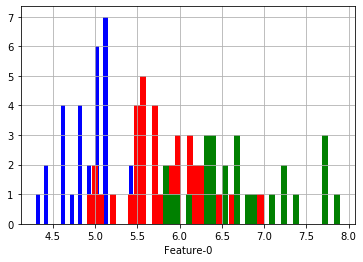

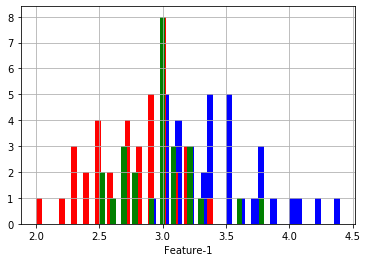

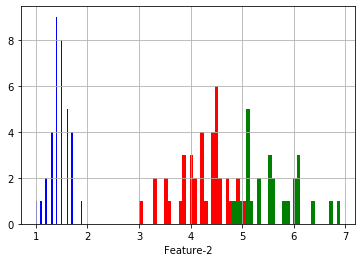

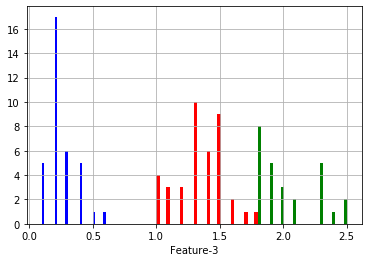

In [6]:
for i in range(X_train.shape[1]):
    plt.hist(X_train[indices_class1, i], bins=30, color="blue")
    plt.hist(X_train[indices_class2, i], bins=30, color="red")
    plt.hist(X_train[indices_class3, i], bins=30, color="green")
    plt.xlabel(labels[i])
    plt.grid()
    plt.show()

## Regression with the Boston Housing Dataset

In the second part of the notebook we will work with a regression dataset called [Boston Housing Dataset](https://archive.ics.uci.edu/ml/datasets/Housing).

* * * 
**REMARKS:** For this dataset we don't provide different files for test and training, because you won't use this dataset in the exercise.
* * * 

This dataset describes 13 different characteristics of suburbs in Boston and the regression task is to estimate house prizes. Is consists of a total of 506 datapoints.

You need the following files in order to run the code:

    housing.data
    housing.labels

### Read in a regression dataset

Each row in this file is a data point and all features are separated by a space. For this task we don't have a separate test and training file as we just want to visualize the data.

In [7]:
import numpy

X = numpy.loadtxt("./housing_all.data", delimiter=" ")
y = numpy.loadtxt("./housing_all.labels", delimiter=" ")
print("found %d data points with %d features each" % (len(X), len(X[0])))

# Use rescaled y as color values. (Max of y is 50)
c = y/50

found 506 data points with 13 features each


### Plot each feature against target value 

Next we will look into the data and plot each feature against its target value. From the plots you will generate you can already guess which of the features are more informative to predict the target (house prizes) than others.

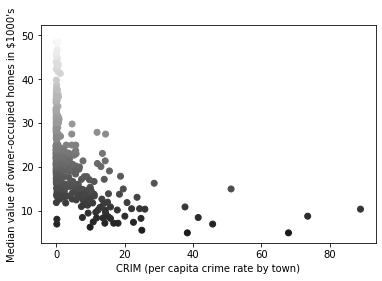

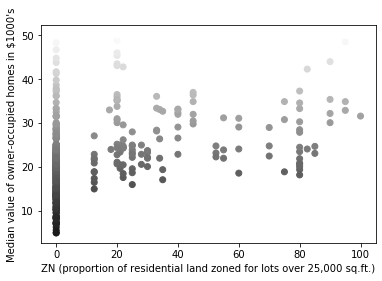

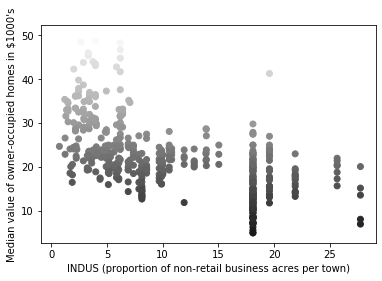

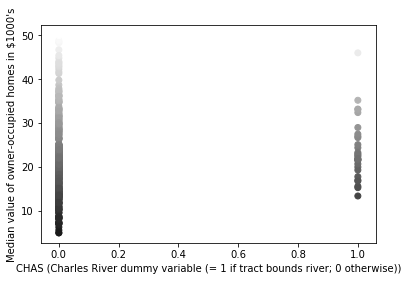

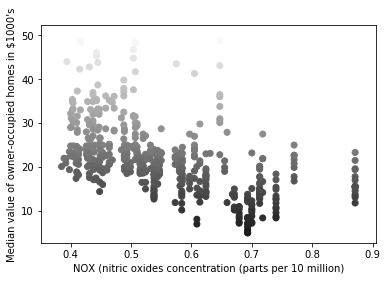

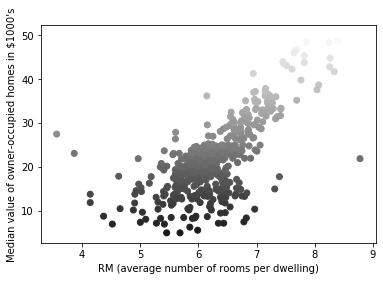

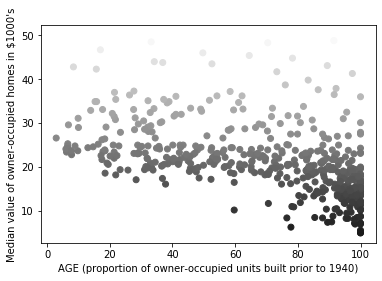

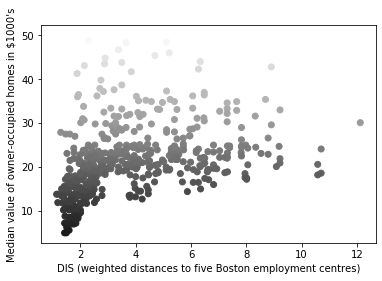

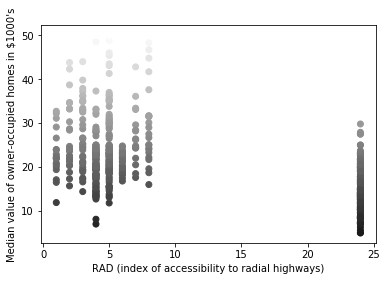

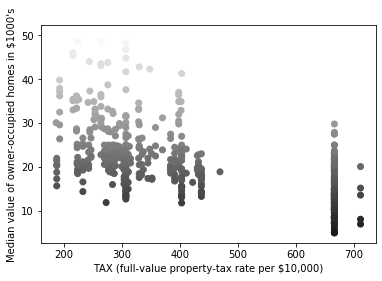

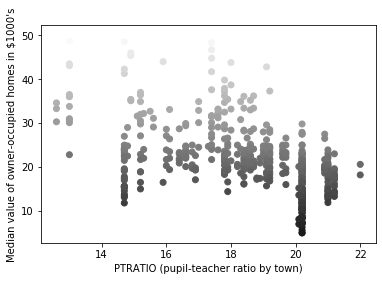

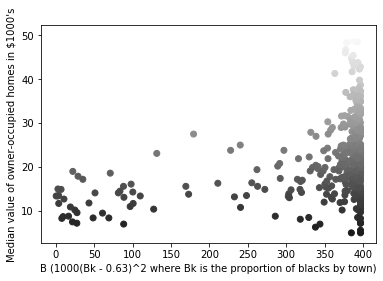

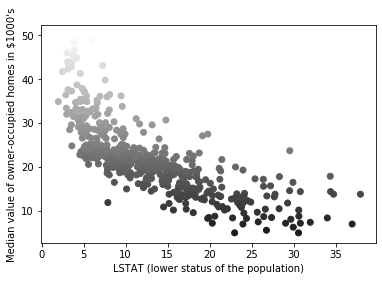

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

feature_labels = ["CRIM (per capita crime rate by town)",
                  "ZN (proportion of residential land zoned for lots over 25,000 sq.ft.)",
                  "INDUS (proportion of non-retail business acres per town)",
                  "CHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))",
                  "NOX (nitric oxides concentration (parts per 10 million)",
                  "RM (average number of rooms per dwelling)",
                  "AGE (proportion of owner-occupied units built prior to 1940)",
                  "DIS (weighted distances to five Boston employment centres)",
                  "RAD (index of accessibility to radial highways)",
                  "TAX (full-value property-tax rate per $10,000)",
                  "PTRATIO (pupil-teacher ratio by town)",
                  "B (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town)",
                  "LSTAT (lower status of the population)"]
target_label = "Median value of owner-occupied homes in $1000's"

# Now we plot each dimension against the target value
#fig, axes = plt.subplots(nrows=13, ncols=1, figsize=(5, 65))
for feature_index, label in enumerate(feature_labels):
    # Use c values as colors and use a sequential colormap "plasma" and not default colormap 'jet'
    plt.scatter([sample[feature_index] for sample in X], y, facecolor=list(zip(c, c, c)), cmap="plasma")
    #plt.colorbar()
    plt.xlabel(label)
    plt.ylabel(target_label)
    # If you don't add plt.show() it will not create a new figure, but plot everything into one figure
    plt.show()